In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4fd46141d0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4fd4614240>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4fd4614278>)

In [18]:
mnist.train.images.shape , mnist.train.labels.shape

((55000, 784), (55000, 10))

In [23]:
#55000,28,28
mnist.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [26]:
mnist.test.images.shape,mnist.train.labels.shape

((10000, 784), (55000, 10))

In [21]:
mnist.validation.images.shape

(5000, 784)

In [27]:
import numpy as np
from matplotlib import pyplot as plt

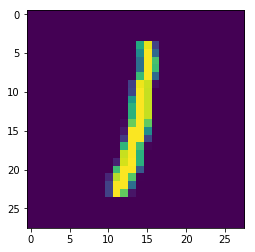

In [30]:
first_image = mnist.train.images[4]
first_image = np.array(first_image,dtype = 'float')
first_image= first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [40]:
with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[ 0.01856705  1.53911483  0.27061683 ..., -0.23735723  0.99800915
   0.16953947]
 [-0.19788294 -0.31273323 -0.12135437 ..., -1.21816313 -1.25120246
   1.26191187]
 [ 0.51409376  0.21448778 -0.09032997 ...,  0.3932887   0.11532468
  -0.2532621 ]
 ..., 
 [ 0.57978982 -0.98621011 -0.20321004 ...,  1.54635572 -0.30057204
   0.75612617]
 [ 1.54617226  0.8421514  -0.48249996 ..., -0.6929208   1.47985792
  -0.75075036]
 [ 0.52601802 -0.370462    0.99904758 ..., -0.43881923  0.63058841
  -0.1741931 ]]


In [42]:
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weights = {
    
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}

biases = {
    
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [43]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    output =tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [44]:
#finding accuracy and predictions

In [45]:
# creating x
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])

Instructions for updating:
Use `argmax` instead


In [70]:
#cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels=y))

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [58]:
pred  =forward_propagation(x,weights,biases)
predictions = tf.arg_max(pred,1)
true_labels = tf.arg_max(y,1)
correct_predictions = tf.equal(predictions,true_labels)

In [66]:
predictions_evaluated,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
predictions_evaluated,labels,correct_pred

(array([4, 4, 4, ..., 4, 3, 3]),
 array([7, 3, 4, ..., 5, 6, 8]),
 array([False, False,  True, ..., False, False, False], dtype=bool))

In [68]:
print(np.sum(correct_pred)*100/len(correct_pred))
correct_pred.sum(),len(correct_pred)

(3280, 55000)